In [1]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

['/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf',
 '/System/Library/Fonts/Supplemental/PTMono.ttc',
 '/System/Library/Fonts/Supplemental/PTSerifCaption.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansSharada-Regular.ttf',
 '/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc',
 '/System/Library/Fonts/Supplemental/Kannada Sangam MN.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Shree714.ttc',
 '/System/Library/Fonts/Supplemental/Impact.ttf',
 '/System/Library/Fonts/Supplemental/Arial Narrow.ttf',
 '/System/Library/Fonts/Supplemental/GujaratiMT.ttc',
 '/System/Library/Fonts/Supplemental/Mishafi Gold.ttf',
 '/System/Library/Fonts/LastResort.otf',
 '/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf',
 '/System/Library/Fonts/Apple Color Emoji.ttc',
 '/System/Library/Fonts/Supplemental/ChalkboardSE.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansPsalterPahlavi-Regular.ttf',
 '/System/Library/Fonts

In [2]:
font_manager.findfont("Liberation Sans")

findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


'/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
path_to_utilsGRF_="../../../../repos/shared/utilsGRF" #GeneRegulatoryFunctions repo
sys.path.append(path_to_utilsGRF_)
import BoundaryFinder as BF
def plot_hillline(ax,nmin=1,nmax=1,colorl="gray",colordict=None,textonly=[],label=True):
    nrange=np.arange(1.4,nmax+0.2,0.05)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    if label:
        label="Hill line"
    else:
        label=None
    ax.plot(hillline[:,0],hillline[:,1],color=colorl,linestyle='-',label=label)
        
    for n in range(nmin,nmax):
        ph,sh=BF.position_steepness_hill(n)
        if colordict is None:
            color=colorl
        else:
            color=colordict[n]
        ax.scatter(ph,sh,color=colorl,marker="x",s=60)
        if n in textonly:
            ax.text(ph+0.02,sh-0.05,'%d'%n,color=color)
        
    #ax.legend()
    #ax.set_xlim(0.499,1.2)
    #ax.set_xlabel('position')
    #ax.set_ylabel('steepness')
    return ax

In [4]:

alphadict=dict()
alphadict["N4"]=dict()
alphadict["N6"]=dict()
foldernew="../boundaryanalysis_notebooks/ashapes"


# Universal model

In [6]:
#new data
plims=[0.3,0.5,0.7,1,2,3]
date="2022_8_23" 

Nsites="N4"
name_ashape="ashape_N4univ" 
model="univ"
alphadict[Nsites][model]=dict()

for i in range(len(plims)):
    ashape=np.load(os.path.join(foldernew,"%s_%g_%s.npy"%(name_ashape,plims[i],date)))
    alphadict[Nsites][model][plims[i]]=ashape

Nsites="N6"
name_ashape="ashape_N6univ" 
model="univ"
alphadict[Nsites][model]=dict()

for i in range(len(plims)):
    
    ashape=np.load(os.path.join(foldernew,"%s_%g_%s.npy"%(name_ashape,plims[i],date)))
    alphadict[Nsites][model][plims[i]]=ashape

   

# Average binding (model I)

In [7]:
#new data
model="av"
Nsites="N4"
alphadict[Nsites][model]=dict()

alphadict_=alphadict[Nsites][model]
name_ashape="ashape_N4av" #
plims=[1,2,3,5,7]
date="2022_8_24"

for i in range(len(plims)):
      
    ashape=np.load(os.path.join(foldernew,"%s_%g_%s.npy"%(name_ashape,plims[i],date)))
    alphadict_[plims[i]]=ashape
    


# Pol activator (model II)

In [8]:
#new data
name_ashape="ashape_N4P" 
plims=[0.5,1,2,3,6]
model="Pol-activator"
Nsites="N4"
alphadict[Nsites][model]=dict()
date="2022_8_24"
for i in range(5):
    
    ashape=np.load(os.path.join(foldernew,"%s_%g_%s.npy"%(name_ashape,plims[i],date)))
    
    alphadict[Nsites][model][plims[i]]=ashape
    
#for N=6 it takes very long to converge, I didn't repeat it again, but have old data if needed

# Pol any basal (model III)

In [9]:
#new data
plims=[1,2,3,4] 
Nsites="N4"

model="Pol-any-basal-P=1" #2021_05_18_N4Pol_anycoop_absder_basalexpresssion_P=1. Finished for plim=1,2,3,4. All converged for 2000, good python accuracy except for sme decimalsConver
alphadict[Nsites][model]=dict()
date="2022_8_24"

name_ashape="ashape_N4Pb1" 

for i in range(len(plims)):
    try:
    
        ashape=np.load(os.path.join(foldernew,"%s_%g_%s.npy"%(name_ashape,plims[i],date)))
    
        alphadict[Nsites][model][plims[i]]=ashape
    except:
        print("limit p=%d not found"%(plims[i]))
        
        
#new data
model="Pol-any-basal-P=500" 
Nsites="N4"
alphadict[Nsites][model]=dict()

name_ashape="ashape_N4Pb500" 
plims=[4,6,7]

for i in range(3):
    plim=plims[i]
        
    ashape=np.load(os.path.join(foldernew,"%s_%g_%s.npy"%(name_ashape,plims[i],date)))
    alphadict[Nsites][model][plims[i]]=ashape




# MWC (model IV)

In [10]:
model="MWC" #run again with the cpp code using directly the formula for the MWC with K1, K2 and L 
name_ashape="ashape_N4MWC"
Nsites="N4"
alphadict[Nsites][model]=dict()
date="2022_8_24"
plims=[3,5,7,9,10] 

for i in range(5):
    
    ashape=np.load(os.path.join(foldernew,"%s_%g_%s.npy"%(name_ashape,plims[i],date)))
    alphadict[Nsites][model][plims[i]]=ashape
    


# 4 sites for A, 2 sites for B (models V, VI)

In [11]:
#newdata
name_ashape="ashape_AminusBav"
plims=[0.5,1,2,3,6]
model="TFA4_TFB2_AminusBav"
Nsites="N4"
alphadict[Nsites][model]=dict()
date="2022_8_24"
for i in range(5):
    ashape=np.load(os.path.join(foldernew,"%s_%g_%s.npy"%(name_ashape,plims[i],date)))
    alphadict[Nsites][model][plims[i]]=ashape
    
    
#new data
name_ashape="ashape_A4allornone" #
model="TFA4_TFB2_A4allornone"
Nsites="N4"
alphadict[Nsites][model]=dict()

for i in range(4):
    ashape=np.load(os.path.join(foldernew,"%s_%g_%s.npy"%(name_ashape,plims[i],date)))
    alphadict[Nsites][model][plims[i]]=ashape

In [12]:
import matplotlib as mpl
mpl.rcParams["font.size"]=18
from matplotlib.patches import ConnectionPatch

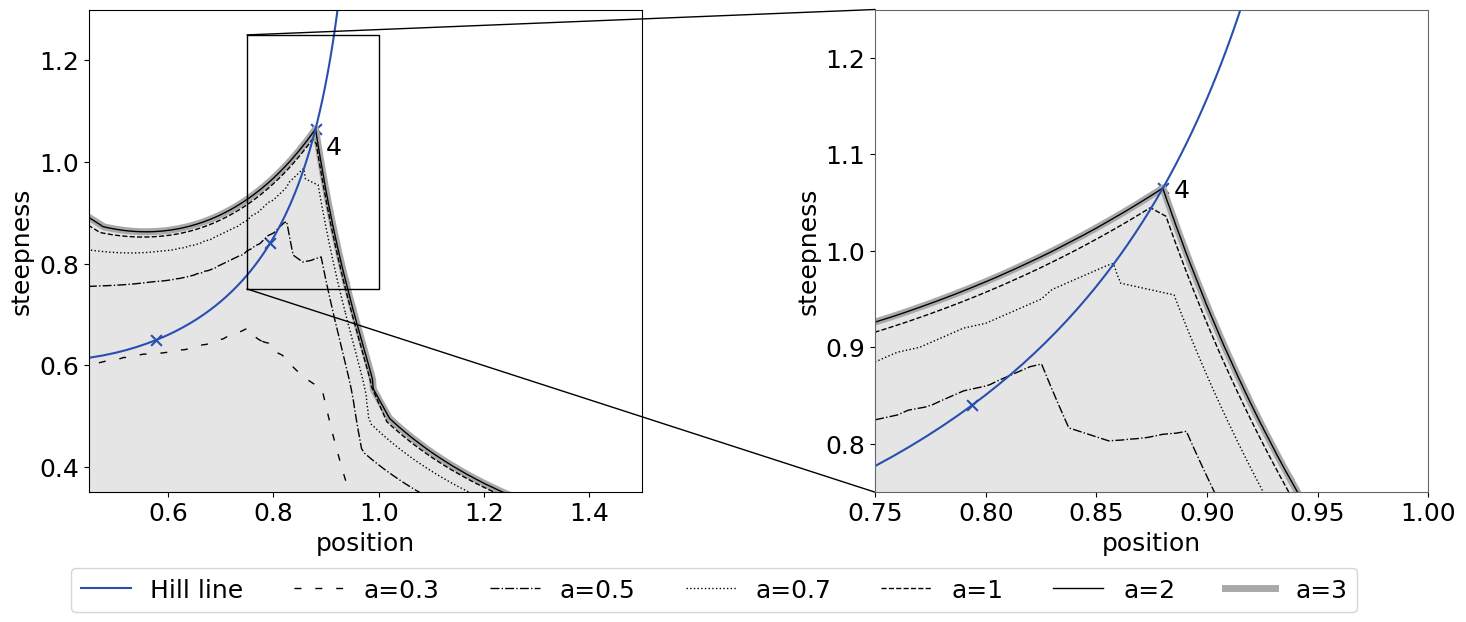

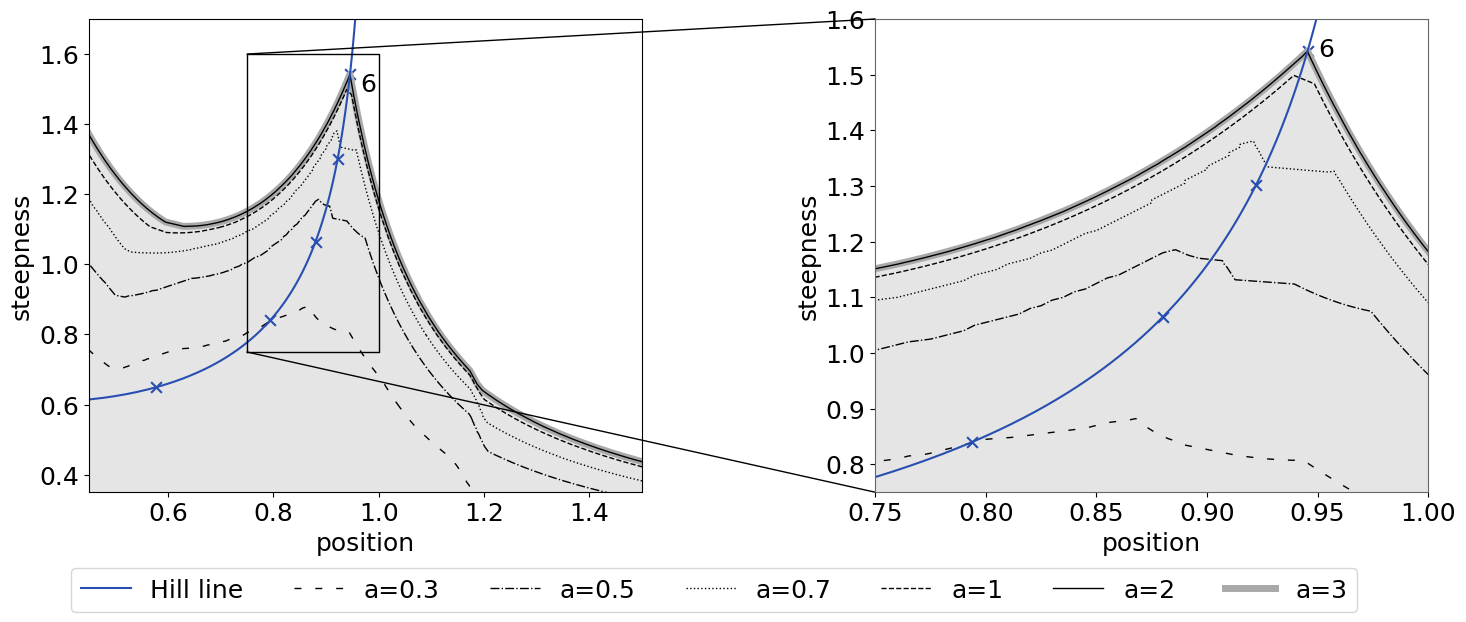

In [13]:
colorhill="#284fb0"
colorb="darkgray"
boundarywidth=5
lastcolors=dict()
for n,Nsites in enumerate(["N4","N6"]):
    pH,sH=BF.position_steepness_hill(int(Nsites[-1]))
    fig,axes=plt.subplots(1,2,figsize=(15,6))

    model="univ"
    alphadict_=alphadict[Nsites][model]
    
    plims=sorted(list(alphadict_.keys()))
    ashape_all=alphadict_[plims[-1]] #asymptotic boundary
    #if Nsites=="N4":

    #colors=["green","lightgreen","yellow","orange","brown"]
    linestyles=[(0, (5, 10)),"dashdot","dotted","dashed","solid"]
    #plt.cm.Blues(np.linspace(0,1,len(plims)+1))[2:]
    #else:
    #    colors=plt.cm.Greens(np.linspace(0,1,len(plims)+3))[2:]

    #fig,ax=plt.subplots(1,1,figsize=(4,4))

    for i in range(len(plims))[::-1]:
        ashape=alphadict_[plims[i]]
        if i<len(plims)-1:
            linewidth=1
        else:
            linewidth=boundarywidth
        if i==len(plims)-1:
            color=colorb
            linestyle="solid"
        else:
            color="k"
            linestyle=linestyles[i]

        for a,ax in enumerate(axes):
            if a==0:
                lab=None
            else:
                lab="a=%g"%plims[i]

            ax.plot(ashape[0],ashape[1],color=color,label=lab,linewidth=linewidth,linestyle=linestyle)
    
    #fig.suptitle("universal boundary "+r"$n=%s$"%Nsites[-1])
    for a,ax in enumerate(axes):
        ax.fill(ashape_all[0],ashape_all[1],color="gray",alpha=0.2)

        if Nsites=="N4":
            nmax=5
        else:
            nmax=7
        if a==0:
            lab=False
            textonly=[int(Nsites[-1])]
        else:
            lab=True
            textonly=[]
        ax=plot_hillline(ax,nmin=2,nmax=nmax,textonly=textonly,colorl=colorhill,colordict={2:"k",3:"k",4:"k",5:"k",6:"k",7:"k"},label=lab)
    ax=axes[1]
    if Nsites=="N4":
        x0=0.75
        x1=1
        y0=0.75
        y1=1.25
        ax0ylim=1.3
    else:
        x0=0.75
        x1=1
        y0=0.75
        y1=1.6
        ax0ylim=1.7
    ax0=axes[0]
    ax0.plot([x0,x1,x1,x0,x0],[y0,y0,y1,y1,y0],linestyle="-",color="k",linewidth=1)
    ax0.set_xlabel("position")
    ax0.set_ylabel("steepness")
    ax0.set_xlim(0.45,1.5)
    ax0.set_ylim(0.35,ax0ylim)
    ax1=axes[1]
    ax1.text(pH+0.005,sH-0.01,"%s"%Nsites[-1])

    ax1.set_xlim(x0,x1)
    ax1.set_ylim(y0,y1)
    gray="#63676c"
    ax1.set_xlabel("position")#,color=gray)
    ax1.set_ylabel("steepness")#,color=gray)
    #ax1.tick_params(color=gray, labelcolor=gray)
    for spine in ax.spines.values():
        spine.set_edgecolor(gray)
    for xy in [(x0,y0),(x0,y1)]:
        con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="data", coordsB="data",
                          axesA=ax0, axesB=ax1, color="k")
        ax1.add_artist(con)
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles[::-1], labels[::-1], loc="lower left",ncol=7,bbox_to_anchor=(0.05,-0.07))
    

    plt.tight_layout(w_pad=-10)
    plt.savefig("../figs/univb%s_lines.pdf"%Nsites,bbox_inches="tight")
    
        #plt.savefig("../figs/univb%s_annotated.pdf"%Nsites,bbox_inches="tight")
    plt.show()

In [13]:
mpl.rcParams["font.size"]=12

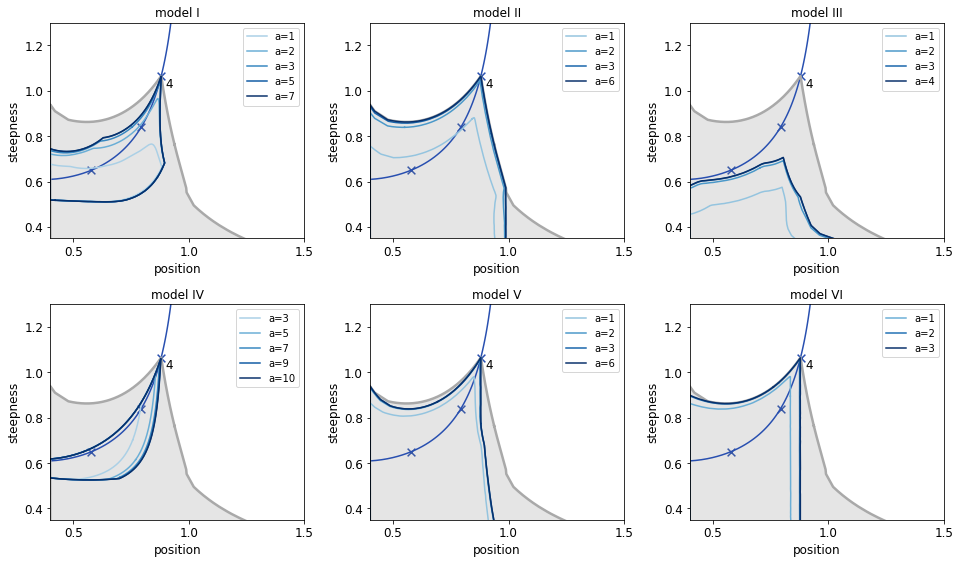

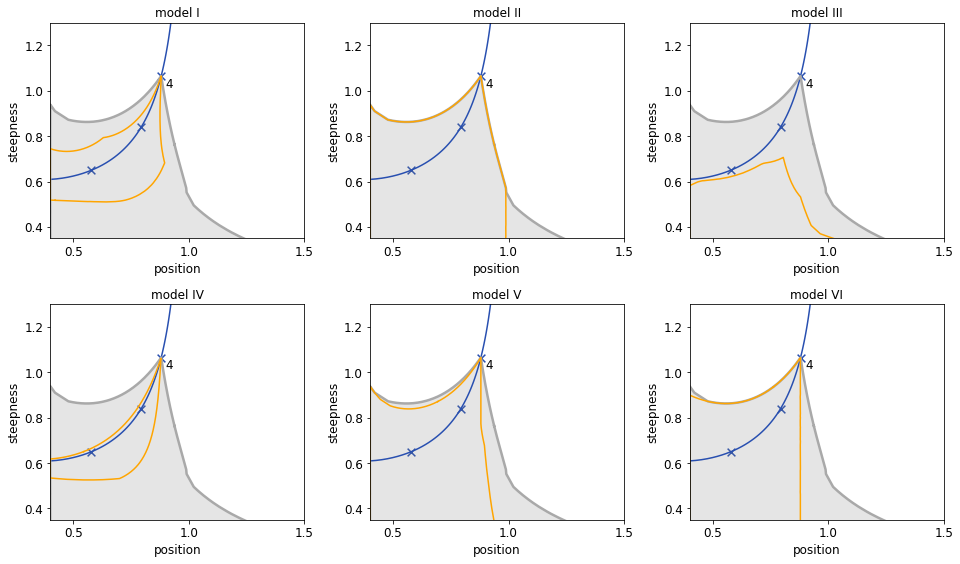

In [14]:
#Fig5S3

models_=["av","Pol-activator","Pol-any-basal-P=1","MWC","TFA4_TFB2_AminusBav", "TFA4_TFB2_A4allornone"]
names=["model I", "model II", "model III","model IV", "model V", "model VI"]
n=0
cmap=plt.cm.Blues
for Nsites in ["N4"]:
    if Nsites=="N4":
        nrows=2
        ncols=3
        models=models_
        ax0ylim=1.3
    else:
        nrows=2
        ncols=2
        models=models_[0:4]
        ax0ylim=1.7
    for i_ in range(2):
        #i_==0: all, i_==1, last only
        fig,axes=plt.subplots(nrows,ncols,figsize=(4.5*ncols,4*nrows))
        allaxes=axes.flatten()
        for n,model in enumerate(models):
            ax=allaxes[n]
            ax=plot_hillline(ax,nmin=2,nmax=int(Nsites[-1])+1,textonly=[int(Nsites[-1])],colorl=colorhill,colordict={2:"k",3:"k",4:"k",5:"k",6:"k",7:"k"},label=False)
            
            model2="univ"
            alphadict_=alphadict[Nsites][model2]
            plims=sorted(list(alphadict_.keys()))
            ashape=alphadict_[plims[-1]]
            ax.plot(ashape[0],ashape[1],color=colorb,linestyle="-",linewidth=2.5) #label="univ,p=%d"%(plims[-1]),)
            ax.fill(ashape[0],ashape[1],color="gray",alpha=0.2)
            
            alphadict_=alphadict[Nsites][model]
            plims=sorted(list(alphadict_.keys()))
            
            if i_==0:
                plims=[x for x in plims if x>0.5]
                colors=cmap(np.linspace(0,1,len(plims)+2))[2:]
            else:
                plims=[plims[-1]]
                colors=["orange"]
            #fig,ax=plt.subplots(1,1,figsize=(4,4))
            ax.set_title(names[n],fontsize=12)
            for i in range(len(plims)):
                ashape=alphadict_[plims[i]]
                if True: #i<len(plims)-1:
                    linestyle="-"
                #else:
                #    linestyle="--"
                
                label="a=%g"%plims[i]
                
                if i_==1:
                    linestyle="-"
                    label=model
                

                ax.plot(ashape[0],ashape[1],color=colors[i],label=label,linestyle=linestyle)

            ax.set_xlabel("position")
            ax.set_ylabel("steepness")
            
            if i_==0:
                ax.legend(loc="upper right",fontsize=10)#bbox_to_anchor=(1,1),
            if Nsites=="N4":
                ax.set_xticks([0.5,1,1.5])
            else:
                ax.set_xticks([0.5,1,1.5,2])
            ax.set_xlim(0.4,1.5)
            ax.set_ylim(0.35,ax0ylim)

            n+=1
        plt.tight_layout()
        plt.savefig("../figs/Fig5S3_%s_%d.pdf"%(Nsites,i_))
        plt.show()


The orange in the paper is different because the figure has been modified with inkscape to also include the model schemas.

**Old figure versions:**

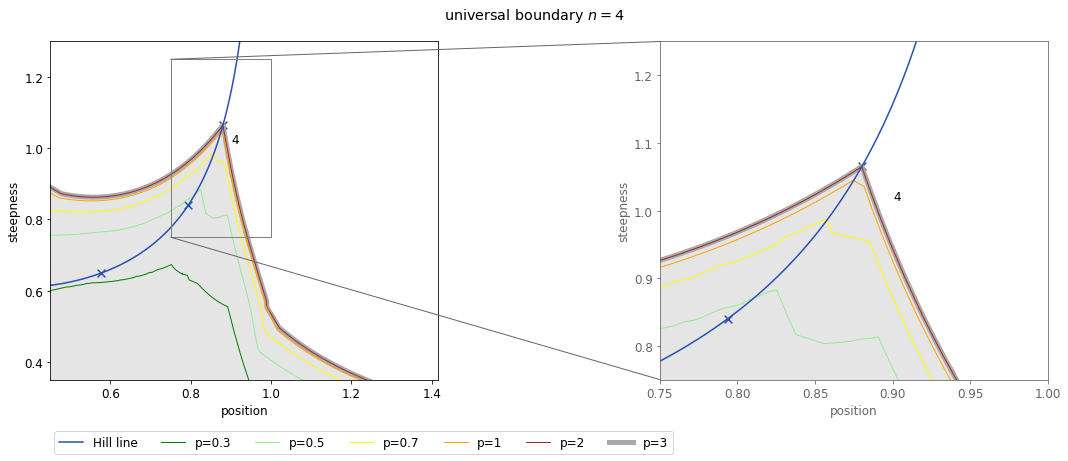

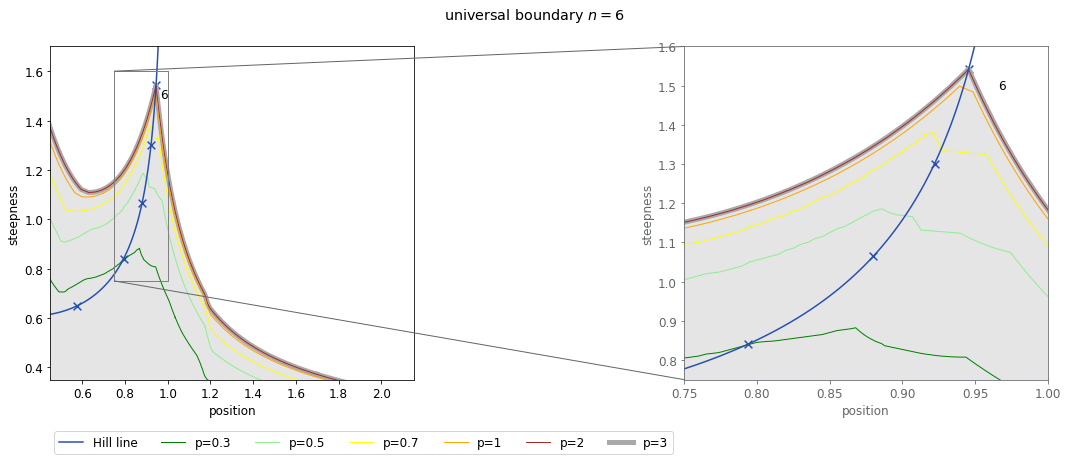

In [15]:
colorhill="#284fb0"
colorb="darkgray"
boundarywidth=5
lastcolors=dict()
for n,Nsites in enumerate(["N4","N6"]):
    
    fig,axes=plt.subplots(1,2,figsize=(15,6))

    model="univ"
    alphadict_=alphadict[Nsites][model]
    
    plims=sorted(list(alphadict_.keys()))
    ashape_all=alphadict_[plims[-1]] #asymptotic boundary
    #if Nsites=="N4":

    colors=["green","lightgreen","yellow","orange","brown"]
    #plt.cm.Blues(np.linspace(0,1,len(plims)+1))[2:]
    #else:
    #    colors=plt.cm.Greens(np.linspace(0,1,len(plims)+3))[2:]

    #fig,ax=plt.subplots(1,1,figsize=(4,4))

    for i in range(len(plims))[::-1]:
        ashape=alphadict_[plims[i]]
        if i<len(plims)-1:
            linewidth=1
        else:
            linewidth=boundarywidth
        if i==len(plims)-1:
            color=colorb
        else:
            color=colors[i]

        for a,ax in enumerate(axes):
            if a==0:
                lab=None
            else:
                lab="p=%g"%plims[i]

            ax.plot(ashape[0],ashape[1],color=color,label=lab,linewidth=linewidth)
    
    fig.suptitle("universal boundary "+r"$n=%s$"%Nsites[-1])
    for a,ax in enumerate(axes):
        ax.fill(ashape_all[0],ashape_all[1],color="gray",alpha=0.2)

        if Nsites=="N4":
            nmax=5
        else:
            nmax=7
        if a==0:
            lab=False
        else:
            lab=True
        ax=plot_hillline(ax,nmin=2,nmax=nmax,textonly=[int(Nsites[-1])],colorl=colorhill,colordict={2:"k",3:"k",4:"k",5:"k",6:"k",7:"k"},label=lab)
    ax=axes[1]
    if Nsites=="N4":
        x0=0.75
        x1=1
        y0=0.75
        y1=1.25
        ax0ylim=1.3
    else:
        x0=0.75
        x1=1
        y0=0.75
        y1=1.6
        ax0ylim=1.7
    ax0=axes[0]
    ax0.plot([x0,x1,x1,x0,x0],[y0,y0,y1,y1,y0],linestyle="-",color="gray",linewidth=1)
    ax0.set_xlabel("position")
    ax0.set_ylabel("steepness")
    ax0.set_xlim(0.45,None)
    ax0.set_ylim(0.35,ax0ylim)
    ax1=axes[1]

    ax1.set_xlim(x0,x1)
    ax1.set_ylim(y0,y1)
    gray="#63676c"
    ax1.set_xlabel("position",color=gray)
    ax1.set_ylabel("steepness",color=gray)
    ax1.tick_params(color=gray, labelcolor=gray)
    for spine in ax.spines.values():
        spine.set_edgecolor(gray)
    for xy in [(x0,y0),(x0,y1)]:
        con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="data", coordsB="data",
                          axesA=ax0, axesB=ax1, color=gray)
        ax1.add_artist(con)
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles[::-1], labels[::-1], loc="lower left",ncol=7,bbox_to_anchor=(0.05,-0.07))
    

    plt.tight_layout(w_pad=-10)
    #plt.savefig("../figs/20220706_univb%s.pdf"%Nsites,bbox_inches="tight")
    
    plt.show()

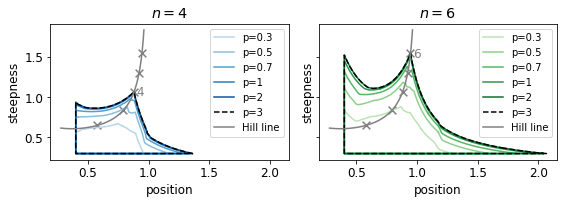

In [16]:
lastcolors=dict()
fig,axes=plt.subplots(1,2,figsize=(8,3),sharex=True,sharey=True)
for n,Nsites in enumerate(["N4","N6"]):
    ax=axes[n]
    
    model="univ"
    alphadict_=alphadict[Nsites][model]
    plims=sorted(list(alphadict_.keys()))
    if Nsites=="N4":

        colors=plt.cm.Blues(np.linspace(0,1,len(plims)+2))[2:]
    else:
        colors=plt.cm.Greens(np.linspace(0,1,len(plims)+2))[2:]

    #fig,ax=plt.subplots(1,1,figsize=(4,4))
    ax.set_title("$n=%s$"%Nsites[-1])
    for i in range(len(plims)):
        ashape=alphadict_[plims[i]]
        if i<len(plims)-1:
            linestyle="-"
        else:
            linestyle="--"
        if i==len(plims)-1:
            color="k"
        else:
            color=colors[i]

        ax.plot(ashape[0],ashape[1],color=color,label="p=%g"%plims[i],linestyle=linestyle)
    

    ax.set_xlabel("position")
    ax.set_ylabel("steepness")
    ax=plot_hillline(ax,nmin=2,nmax=7,textonly=[int(Nsites[-1])])
    ax.legend(fontsize=10)
plt.tight_layout()
#plt.savefig("../figs/Fig3.pdf")
plt.show()

N4 av
N4 Pol-any-basal-P=500
N4 MWC


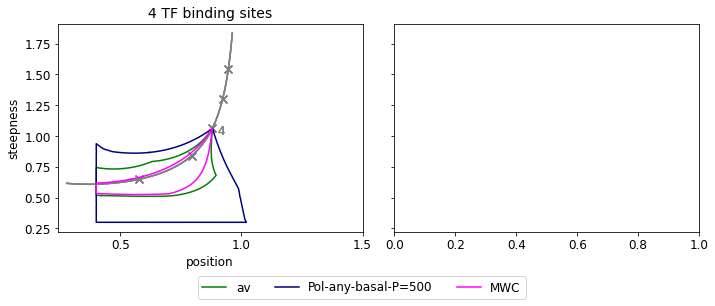

In [18]:


models=["av","Pol-any-basal-P=500","MWC"]
colors=["green","navy","magenta","olive"]
n=0

fig,axes=plt.subplots(1,2,figsize=(10,4),sharey=True)
for N,Nsites in enumerate(["N4"]):
    ax=axes[N]
    i_=1  #i_==0: all, i_==1, last only
        
    
    
        
    ax.set_title("%s TF binding sites"%Nsites[-1],fontsize=14)

    for n,model in enumerate(models):
        print(Nsites, model)

        ax=plot_hillline(ax,nmin=2,nmax=7,textonly=[int(Nsites[-1])],label=False)
        model2="univ"
        alphadict_=alphadict[Nsites][model2]
        plims=sorted(list(alphadict_.keys()))

        ashape=alphadict_[plims[-1]]


        #ax.plot(ashape[0],ashape[1],color="k",linestyle="--",linewidth=2,label="universal") #label="univ,p=%d"%(plims[-1]),)

        alphadict_=alphadict[Nsites][model]
        plims=sorted(list(alphadict_.keys()))

        if i_==0:
            plims=[x for x in plims if x>0.5]
            #colors=cmap(np.linspace(0,1,len(plims)+2))[2:]
        else:
            plims=[plims[-1]]
            #colors=[cmap(np.linspace(0,1,len(plims)+2))[2:][-1]]
        #fig,ax=plt.subplots(1,1,figsize=(4,4))

        for i in range(len(plims)):
            ashape=alphadict_[plims[i]]
            if i<len(plims)-1:
                linestyle="-"
            else:
                linestyle="--"

            label="p=%g"%plims[i]

            if i_==1:
                linestyle="-"
                label=model
            
            #if Nsites=="N4":
            #    label=None
                


            ax.plot(ashape[0],ashape[1],color=colors[n],label=label,linestyle=linestyle)

        ax.set_xlabel("position")
        ax.set_ylabel("steepness")


        
        if Nsites=="N4":
            ax.set_xticks([0.5,1,1.5])
        else:
            ax.set_xticks([0.5,1,1.5])
        #ax.set_xlim(0.4,2.3)


        n+=1
fig.legend(loc="center",fontsize=12,bbox_to_anchor=(0.5,-0.02),ncol=3)
plt.tight_layout()
#plt.savefig("../figs/threemodels_N4_N6.pdf",bbox_inches="tight")
plt.show()
